In [1]:
print("Hello World!")


Hello World!


In [5]:
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


<function matplotlib.pyplot.show(close=None, block=None)>

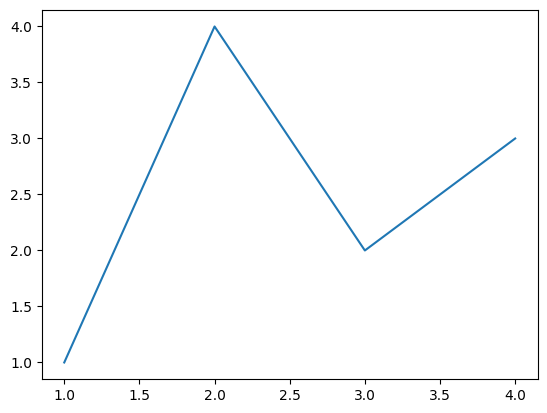

In [6]:
# Create a figure containing a single axis.
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])

# Display the plot.
plt.show


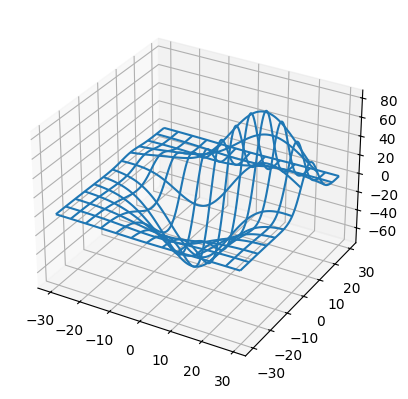

In [7]:

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt # same as before

fig = plt.figure() # Create a new figure
ax = fig.add_subplot(111, projection="3d") # Add a 2D Axis
X, Y, Z = axes3d.get_test_data(0.05) # Add test data
# Plot a the 3D wireframe. Stride defines the wire mesh size.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
# Show the plot to the user.
plt.show()


Part 2 - Loading the Data

In [8]:
import csv

with open('titanic-data.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    titanic_data = {'age': [], 'sex': [], 'pclass': [], 'survived': []}
    for row in reader:
        if row['age'] != '?':
            titanic_data['age'].append(float(row['age']))
        titanic_data['sex'].append(row['sex'])
        titanic_data['pclass'].append(int(row['pclass']))
        titanic_data['survived'].append(row['survived'])


## Part 3 - Plotting Age Distribution

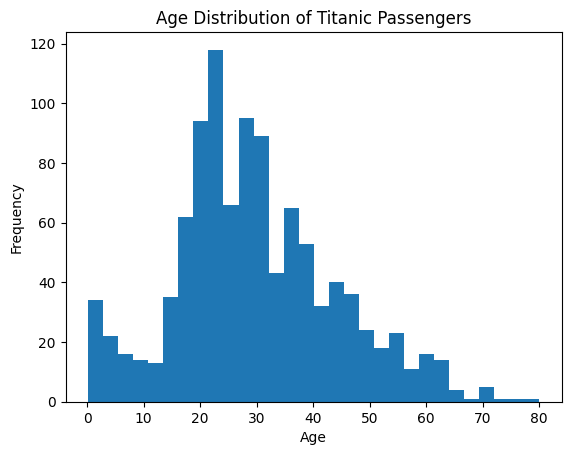

In [49]:
plt.hist(titanic_data['age'], bins=30)
plt.title("Age Distribution of Titanic Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


## Part 4 - Plotting Gender Distribution

In [47]:
from collections import Counter

sex_counts = Counter(titanic_data['sex'])


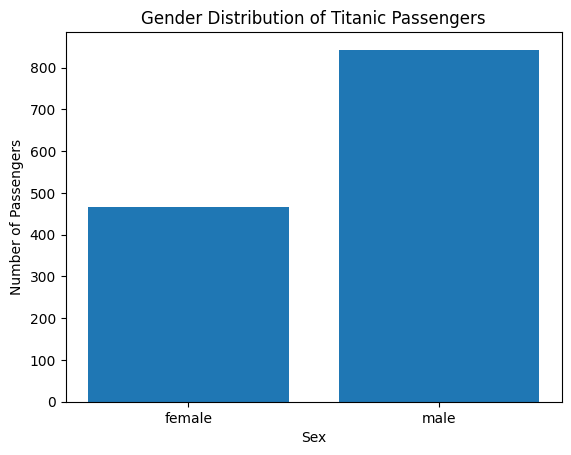

In [48]:
plt.bar(sex_counts.keys(), sex_counts.values())
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.title("Gender Distribution of Titanic Passengers")
plt.show()


## Plotting Class Distribution

In [30]:
number_survivors_by_class = Counter(titanic_data['pclass'])
print(number_survivors_by_class)


Counter({3: 709, 1: 323, 2: 277})


Text(0.5, 1.0, 'Class Distribution of Titanic Passengers')

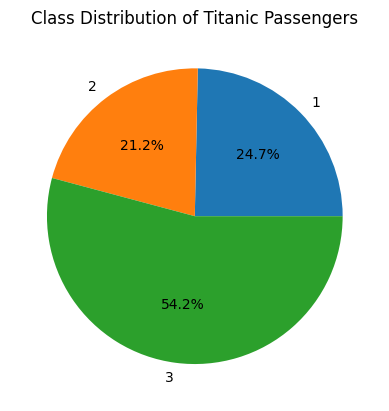

In [40]:
plt.pie(number_survivors_by_class.values(), labels=number_survivors_by_class.keys(), autopct='%1.1f%%')
plt.title("Class Distribution of Titanic Passengers")


1. Calculate the number of survivors and total passengers in each
class using list comprehensions and the `Counter` class from the collections module.

In [ ]:
total_passengers_by_class = Counter(titanic_data['pclass'])
survivors_by_class = Counter([pclass for pclass, survived in zip(titanic_data['pclass'], titanic_data['survived']) if survived == '1'])
print(total_passengers_by_class)


Counter({3: 709, 1: 323, 2: 277})


2. Calculate the survival rates by dividing the number of survivors by the total passengers in each class

In [62]:
survival_rate = {
  pclass: survivors_by_class[pclass] / total_passengers_by_class[pclass] for pclass in total_passengers_by_class
  }
print(survival_rate)


{1: 0.6191950464396285, 2: 0.4296028880866426, 3: 0.2552891396332863}


3. Use `plt.bar()` to create the bar chart with appropriate labels for the x-axis, and set the y-axis range between 0 and 1 to represent the survival rates as percentages

4. Set a title for the plot using plt.title(), and label the y-axis using `plt.ylabel()`. Customize the plot further by setting the x-axis labels to "1st Class", "2nd Class", and "3rd Class"


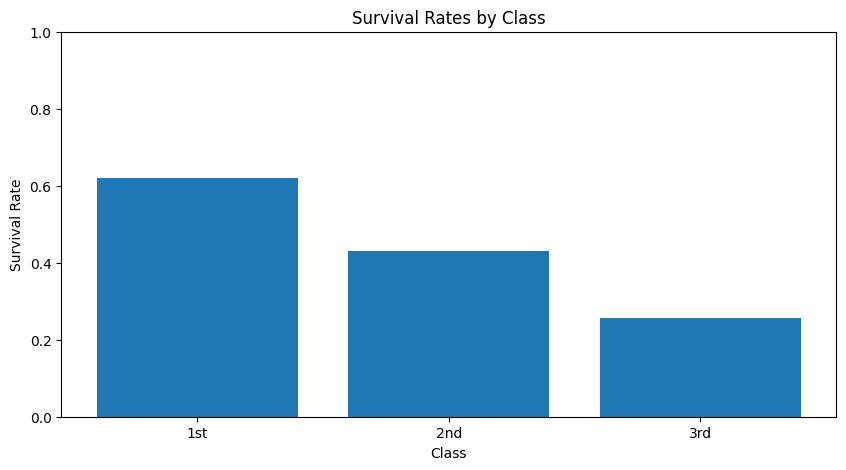

In [ ]:
labels = ["1st Class", "2nd Class", "3rd Class"]
survival_rate_sorted = [survival_rate[pclass] for pclass in sorted(survival_rate)]
plt.figure(figsize=(10, 5))
plt.bar(labels, survival_rate_sorted)
plt.title("Survival Rates by Class")
plt.xlabel("Class")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()
